# Beginner - EDA and Visualizations


Beginner Section Activities (Basic Data Analysis or EDA):
* Import / initial look (see dataframe)
* Plot several histograms of features
* Using different plotting libraries (scatterplot)
    - Seaborn, Altair, Matplotlib
* Show basic statistics
* Identifying problems (0 value columns)
* Subset by features and by samples
    - In context of training / testing
    - Possibly do correlation with column subset 


# Overview

This is the beginner level notebook for the Data Science (DS) and Machine Learning (ML) FredHutch.io tutorial, where we will work through beginning to end on different aspects and techniques in DS for Research and Analysis. 

In this notebook we will work through the process of data analysis for the [gene expression cancer RNA-Seq Data Set](https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq#). This is the beginner or novice notebook and we will focus on general data cleanup, manipulation, and analysis techniques in **python**. We will introduce *python libraries* which will be used all through the three tutorial notebooks.
> **Libraries Used in This Tutorial**
* Data Manipulation and Processing
     - [pandas]( https://pandas.pydata.org/)
     - [numpy]( https://numpy.org/)
* Data Visualization
	- [Matplotlib](https://matplotlib.org/)
    - [Seaborn](https://seaborn.pydata.org/)
    - [Altair](https://altair-viz.github.io/) 



# Table of Contents
[1. Setup](#1.-Setup)

* [1.1 Importing Libraries](#1.1-Importing-Libraries)


## 1. Setup

### 1.1 Importing Libraries


In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

# the output of plotting commands is displayed inline within the notebook
%matplotlib inline

## Importing the Data
To do anything with your data, you need to get the data into an 'object' that python can interact with.

The Pandas library we imported above features some built in functions to read a file which is in '.csv' format and create a Pandas dataframe from it:

### 1.2 Loading Data and Initial observations

Now that we have imported our initial libraries, we can now use these to load our data into the notebook to start out analysis. Both **pandas** and **numpy** are powerful libraries capable of handling loading data, but the standard is **pandas** as it is design for this purpose:

> *it offers data structures and operations for manipulating numerical tables and time series.*

*pandas* offers a variety of functions for loading data depending on the type of file format that your data is stored (e.g. *csv, txt, json, …*), the different formats can be [found here]( https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).

Our specific dataset comes from a tar.gz file and once extracted we have the data in two *csv* files
> * data.csv – file containing the individual samples gene expression cancer RNA-Seq Data Set
* labels.csv – files with the Class of cancer (BRCA, KIRC, COAD, LUAD and PRAD) each sample belongs to

You will want to have the correct file path in relation to where your current working notebook is located to properly load the file (i.e., folder/subfolder/data.csv). For our notebook, the files are located in the same directory so we can just write the names into the [*pd.read_csv()*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function. The pandas functions to read in data provide with a wide range of options to parse in the data, such as setting in the appropriate header row or index columns. If the data is already formatted, the functions are pretty well suited at reading these default values. Our data should be quite well formatted and we can leave the default values to these available arguments, but we'll give the basic arguments for headers and index as an example. 

In [2]:
# loading data from csv files with pandas
# read_csv will create a dataframe structure
raw_data = pd.read_csv('../data.csv', header=0, index_col=None)
data_labels = pd.read_csv('../labels.csv', header=0, index_col=None)

Ok great, we've run our first python code for the data analysis! ... But we should make sure everything worked out properly. We should make sure that the entire dataset was loaded properly and also check how the dataframe created looks. 


## Taking a Look

The first thing you might want to do is see if your data made it into the dataframe as you intended.

The quickest way to take a look at your data is to use the **head()** or **tail()** functions, which print out the first or last few rows of the dataframe.

To check that the entire data was loaded we can use the function *df.shape*, where df is the generic name given to the dataframe created, giving us the number of rows and columns the dataframe contains. Then we can look at the actual dataframe through the *df.head(n=5)*, where n is the number of rows we want to display and is by default 5.

In [3]:
# shape tells us the number of rows (individual cases) and coloumns (genes)
# we can print out the shape of both dataframes
# we'll put the data shapes into a dictionary to then print out
shapes = {'rawdata':raw_data.shape, 'labels':data_labels.shape}
print('data.csv \t- Row, Col :{0[rawdata]} \nlabels.csv \t- Row, Col :{0[labels]}'
     .format(shapes))

data.csv 	- Row, Col :(801, 20532) 
labels.csv 	- Row, Col :(801, 2)


In [3]:
# checking the loaded dataframe using head()
raw_data.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [4]:
# checking the loaded dataframe using tail()
raw_data.tail()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
796,sample_796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,sample_797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,sample_798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,sample_799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000
800,sample_800,0.0,2.325242,3.805932,6.530246,9.560367,0.0,7.957027,0.000000,0.0,...,6.403075,8.594354,10.243079,9.139459,10.102934,11.641081,10.607358,9.844794,4.550716,0.000000


Awesome! At a the quick glance it looks like both data files were loaded into their respective dataframes.
This dataset is actually quite large with over 20K columns, so it would be useful to learn how to slice and filter through the dataframe to create smaller more manageable set.

## Subsetting a Dataframe
It is important to be able to select subsets of your data - both by selecting samples, and by selecting features (columns).

First let's look at selecting by rows...

In [5]:
# Select a row
raw_data.iloc[1]

Unnamed: 0    sample_1
gene_0               0
gene_1        0.592732
gene_2         1.58842
gene_3         7.58616
                ...   
gene_20526     12.6746
gene_20527     10.5171
gene_20528     9.39785
gene_20529     2.09417
gene_20530           0
Name: 1, Length: 20532, dtype: object

In [7]:
# Select various rows

# Make a list with the row indexes you want
rows = list([1, 2, 3])
# Pass that list to iloc
raw_data.iloc[rows]

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0


In [6]:
# Select a range of columns

raw_data.iloc[:,12:15]

,gene_11,gene_12,gene_13
0,1.334282,2.015391,0.591871
1,0.587845,2.466601,1.004394
2,0.452595,1.981122,1.074163
3,0.434882,2.874246,0.000000
4,1.275841,2.141204,0.000000
...,...,...,...
796,0.000000,3.328722,0.000000
797,1.049282,2.666211,0.000000
798,4.049317,3.464198,0.586693
799,1.800703,3.635255,0.000000



There is something interesting about the **raw_data** dataframe, if we look at *gene_5* and *gene_8*, we can see that it looks like both are only filled with zero values. Given we are working with gene expression data, the fact that some genes will have 0 is to be expected. However, it might be the case that due to the way data is loaded or prior formatting, we would have to deal with **0s** or **NA (Nan)** values that are not expected in our research. This is something that occurs more often than not, so it is a great idea to always check for Nan values (or 0s) and go through the appropriate solutions on handling these for your specific field of research, which might be omitting these or creating some approximation for them. 

## Dealing with Problem Features
In this dataset, various genes have 0 expression for every sample. It may be desirable to remove these columns before applying certain statistical or machine learning tools to it.

Let's select the columns where all values are not 0. We use the **.loc** function - where the **iloc** function above lets us select from our data by index values, **.loc** allows us to select by content.

Pandas has some useful built in functions to help with these type of problems. Another option would be working with some libraries in **numpy**, and the advantage is for larger dataframes, as numpy functions tent to be a bit faster than pandas. For now we will use the [*isnull()*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html) function which will find for us the NA values. This will create a boolean value for the dataframe checking if the values are NaN (true) or not NaN (false). We will use this along with the [*any()*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html) which will let us subset the coloumns with any values or all rows, equaling the desired value, by choosing an axis 0 for columns or 1 for rows.  

In [7]:
# Checking the number of NAs by row and by columns
print('Number of rows with any NA : {0:5d} \nNumber of cols with any NA : {1:5d}'
      .format(raw_data.loc[raw_data.isnull().any(axis=1),:].shape[0], raw_data.loc[:,raw_data.isnull().any(axis=0)].shape[1]))

Number of rows with any NA :     0 
Number of cols with any NA :     0


It looks like we don't have any NAs to worry about in our gene sequence data. We did however see a lot of 0 values on some specific genes (i.e., gene_5, gene_8), so it would be good to figure out how many of these genes are there with all 0 values in our data set, or if any of the individual samples (rows) have all 0s as well. We'll now use the same method as above but with the [*all()*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.all.html) function and also the [*isin()*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html) function which allows us to pass in values to match.

In [8]:
# Checking the number of row and and columns that have all zero values
print('Number of rows with all Zero values : {0:5d} \nNumber of cols with all Zero values : {1:5d}'
      .format(raw_data.loc[raw_data.isin([0]).all(axis=1),:].shape[0], raw_data.loc[:,raw_data.isin([0]).all(axis=0)].shape[1]))

Number of rows with all Zero values :     0 
Number of cols with all Zero values :   267


Great as expected none of our individual samples (rows) have all 0 values for each gene in the sequence. We do however have 267 genes (columns) that have 0 value for all the samples and something that we might want to address. One option is to drop these genes from the data, but for now we will let keep them. Let's however have a quick look at what genes these happen to be, this is another perfect time to practice slicing and getting a subset of the dataframe.

In [9]:
# Getting a dataframe subset with only the columns that have 0 for all the values
raw_data.loc[:,raw_data.isin([0]).all(axis=0)]

,gene_5,gene_23,gene_4370,gene_4808,gene_4809,gene_4814,gene_4816,gene_4817,gene_4831,gene_5288,...,gene_18908,gene_18909,gene_18910,gene_18911,gene_18914,gene_18915,gene_19450,gene_19451,gene_19452,gene_19671
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Analysis


### 2.1 General Descriptive Statistics

An important start to our analysis is to get some descriptive statistics for our dataframe. If what we care about is the statistics of specific genes across the different samples, then our dataframe is already perfectly set for us to use the [*df.describe()*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) function, which provide the general statistical values of columns (i.e., mean, sd, min, max, …).

In [10]:
# describe will give some statistical values
data_stat_describe = raw_data.describe()
data_stat_describe

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


We can now see the general descriptive statistics and summary of the genes dataframe for the different samples. We can also see that indeed gene 5 is a gene with 0 expression. 


### 2.3 Visualising Statistics

We can also create some visualizations for the statistics that would paint a better picture of the gene data. One of the basic ways to accomplish this would be through some histograms for the individual genes. Now, our data constains quite a large amount of columns (genes) and as a result would be best to focus on individual or smaller subset groups when creating histograms for them. 

Pandas has a quick integrated set of [plotting](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) functions, among which we can plot histograms with the function **hist**.
Like said before, we will create a histogram for one for one of the genes, in this case genes 2, 4, and 6 which we'll subset from the main dataframe.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fad4c8d1550>,
      dtype=object)

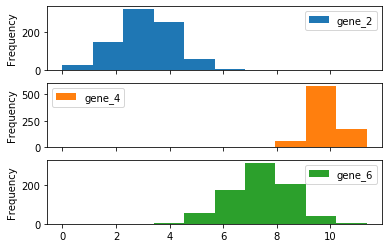

In [11]:
# plotting genes 2, 4, and 6 into a histogram of their gene sequence values for all samples
raw_data.plot(y=['gene_2','gene_4','gene_6'], kind='hist', subplots=True)

This is a great start to get a better picture of the gene data. The pandas plotting function can take more arguments and create cleaner figures if so desired, but for better and more complex figures we will move one to using libraries like [Matplotlib](https://matplotlib.org/) and [Seaborn](https://seaborn.pydata.org/). There is however a few extra data wrangling and transforming that needs to be done prior to working witht he libraries.

Data is in what is known as **wide format**, more columns than rows. Given we are interested in doing some EDA and visualizations, it is more conveninent to have a dataframe in **long format**, more rows than columns, which can be accomplish by transposing the dataframe.

In [12]:
data_transpose = raw_data.T
data_transpose.head()

,0,1,2,3,4,5,6,7,8,9,...,791,792,793,794,795,796,797,798,799,800
Unnamed: 0,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,...,sample_791,sample_792,sample_793,sample_794,sample_795,sample_796,sample_797,sample_798,sample_799,sample_800
gene_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.436588,0,0,0,0,0
gene_1,2.01721,0.592732,3.51176,3.66362,2.65574,3.46785,1.22497,2.85485,3.99212,3.64249,...,3.08006,4.3374,2.06822,4.28839,4.47218,1.86564,3.94296,3.24958,2.59034,2.32524
gene_2,3.26553,1.58842,4.3272,4.50765,2.82155,3.58192,1.69118,1.75048,2.77273,4.42356,...,2.81574,2.59713,0.857663,3.45249,4.90875,2.7182,4.45381,3.70749,2.78798,3.80593
gene_3,5.47849,7.58616,6.88179,6.65907,6.53945,6.62024,6.57201,7.22672,6.54669,6.84951,...,6.20962,6.07038,6.21874,7.20915,5.93785,7.3501,6.3466,8.1859,7.31862,6.53025


Ok now we see that the *genes* are in the rows, but we see that the *samples* became the first row and we want them to be headers.

In [13]:
data_transpose_new_headers_df = data_transpose.copy()
dt_new_header = data_transpose_new_headers_df.iloc[0] #grab the first row for the header
data_transpose_new_headers_df = data_transpose_new_headers_df[1:] #take the data less the header row
data_transpose_new_headers_df.columns = dt_new_header #set the header row as the df header

In [14]:
data_transpose_new_headers_df.head()

Unnamed: 0,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,...,sample_791,sample_792,sample_793,sample_794,sample_795,sample_796,sample_797,sample_798,sample_799,sample_800
gene_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.436588,0,0,0,0,0
gene_1,2.01721,0.592732,3.51176,3.66362,2.65574,3.46785,1.22497,2.85485,3.99212,3.64249,...,3.08006,4.3374,2.06822,4.28839,4.47218,1.86564,3.94296,3.24958,2.59034,2.32524
gene_2,3.26553,1.58842,4.3272,4.50765,2.82155,3.58192,1.69118,1.75048,2.77273,4.42356,...,2.81574,2.59713,0.857663,3.45249,4.90875,2.7182,4.45381,3.70749,2.78798,3.80593
gene_3,5.47849,7.58616,6.88179,6.65907,6.53945,6.62024,6.57201,7.22672,6.54669,6.84951,...,6.20962,6.07038,6.21874,7.20915,5.93785,7.3501,6.3466,8.1859,7.31862,6.53025
gene_4,10.432,9.62301,9.87073,10.1962,9.73826,9.70683,9.64051,9.75869,10.4883,9.46447,...,9.64447,9.86399,10.6231,9.87562,9.3309,10.006,10.0569,9.50408,9.98714,9.56037


Now to make a simpler handling when plostting the data in **seaborn**, we'll take the index of the dataframe (*Unnamed: 0*) and reset it to get a number for each gene. This will be the fastest way to go through the 20K genes.

In [15]:
data_transpose_new_headers_df.reset_index(inplace=True)
data_transpose_new_headers_df['gene'] = data_transpose_new_headers_df.index

data_transpose_new_headers_df.head()

Unnamed: 0,index,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,...,sample_792,sample_793,sample_794,sample_795,sample_796,sample_797,sample_798,sample_799,sample_800,gene
0,gene_0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.436588,0,0,0,0,0,0
1,gene_1,2.01721,0.592732,3.51176,3.66362,2.65574,3.46785,1.22497,2.85485,3.99212,...,4.3374,2.06822,4.28839,4.47218,1.86564,3.94296,3.24958,2.59034,2.32524,1
2,gene_2,3.26553,1.58842,4.3272,4.50765,2.82155,3.58192,1.69118,1.75048,2.77273,...,2.59713,0.857663,3.45249,4.90875,2.7182,4.45381,3.70749,2.78798,3.80593,2
3,gene_3,5.47849,7.58616,6.88179,6.65907,6.53945,6.62024,6.57201,7.22672,6.54669,...,6.07038,6.21874,7.20915,5.93785,7.3501,6.3466,8.1859,7.31862,6.53025,3
4,gene_4,10.432,9.62301,9.87073,10.1962,9.73826,9.70683,9.64051,9.75869,10.4883,...,9.86399,10.6231,9.87562,9.3309,10.006,10.0569,9.50408,9.98714,9.56037,4


#### 2.3.1 Seaborn and Matplotlib

The basic plotting library in python is **matplotlib** and a lot can be accomplished with its integrated functions, depending on how much you are willing to work to get it exactly how you want. Given that we are interested in statistical visualizations, we are going to work with the **seaborn** library:
> Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Alright so let's try to make a better histogram, or distribution plots, than the basic ones we did before.


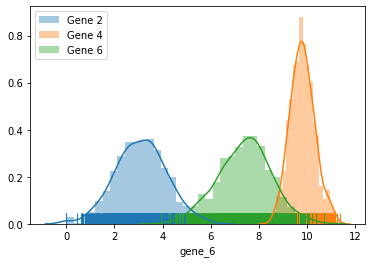

In [16]:
# sns.distplot(raw_data[['gene_2','gene_4','gene_6']])
sns.distplot(raw_data.gene_2, hist=True, rug=True, label='Gene 2')
sns.distplot(raw_data.gene_4, hist=True, rug=True, label='Gene 4')
sns.distplot(raw_data.gene_6, hist=True, rug=True, label='Gene 6')
plt.legend()
plt.show()

Personally I think this is already an improvement from the plots we did through pandas and matplotlib earlier. More aesthetic improvements can be accomplished, and we'll leave that for you to explore. For now we will try some more seaborn plots and improving aesthetics

Let's now do a simple visualization to check how the gene sequece shows in the samples. Let's first do a simple one looking at the first sample, **sample_0**

We'll plot the sample's gene values in a scatter plot.

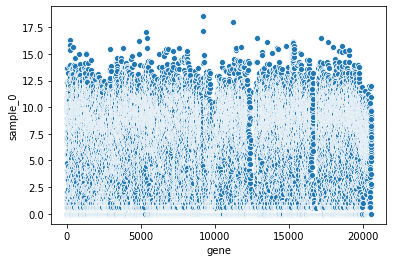

In [17]:
# first basic scatterplot visualization 
sns.scatterplot(y="sample_0", x='gene', data=data_transpose_new_headers_df)
plt.show()

Ok great, we've created the scatterplot visual, it is rough and small, so here is where we will start to make adjustments to get a better understanding of our gene data.

We'll adjust the size of the figure, the axis, and the level of transparancy of the points (here known as alpha). We can also take a moment to address the *"Plot Style"*, the preset look of that would come out from your figure. You can look at the various styles matplotlib has available [here](https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html). For now we will use the "ggplot" style.

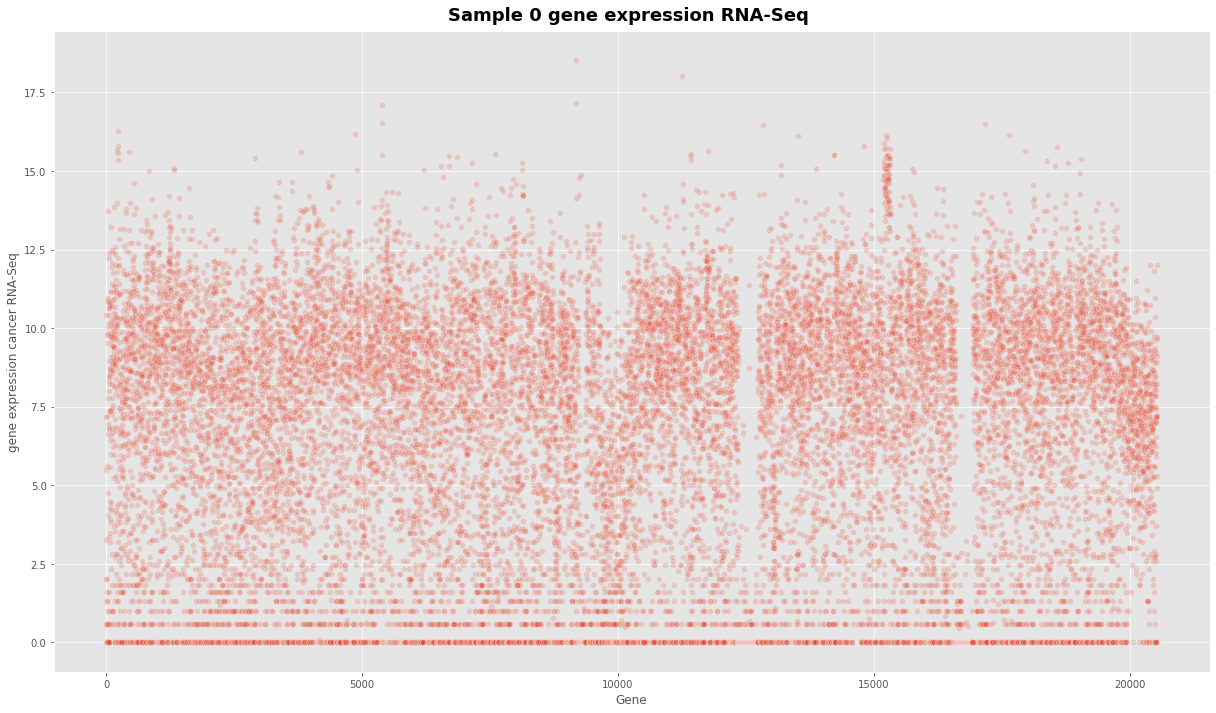

In [18]:
# setting up the plot style
plt.style.use('ggplot')

fig_dims = (17, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(ax=ax, y="sample_0", x='gene', data=data_transpose_new_headers_df,
               alpha=.2)

# make adjustments
ax.set_ylabel('gene expression cancer RNA-Seq')
ax.set_xlabel('Gene')

ax.text(x=0.5, y=1.01, s='Sample 0 gene expression RNA-Seq ', fontsize=18, 
        weight='bold', ha='center', va='bottom', transform=ax.transAxes)

fig.tight_layout()
plt.show()

Ok so now that we've plotted the gene sequence for one sample, lets see if we can get a better view as to how the different samples compare for each sample cancer type.

We need to add a the labels for the samples, which can be done for the 

In [19]:
data_wide = raw_data.copy()
data_wide['Class'] = data_labels.Class.values
data_wide.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [20]:
data_wide_noindex = data_wide.reset_index()
data_wide_noindex['Unnamed: 0'] = data_wide_noindex.index
data_wide_noindex.head()

,index,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,0,0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,1,1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,2,2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,3,3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,4,4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [21]:
data_wide_melt = data_wide_noindex.drop(columns=['index','Unnamed: 0']).melt(id_vars=['Class'])
data_wide_melt.head()

,Class,variable,value
0,PRAD,gene_0,0.0
1,LUAD,gene_0,0.0
2,PRAD,gene_0,0.0
3,PRAD,gene_0,0.0
4,BRCA,gene_0,0.0


In [22]:
data_melt = data_wide_melt.copy()
data_melt['variable'] = data_melt['variable'].map(lambda x: x.lstrip('gene_'))
data_melt.rename(columns={"variable": "Gene"}, inplace=True)
data_melt.head()

,Class,Gene,value
0,PRAD,0,0.0
1,LUAD,0,0.0
2,PRAD,0,0.0
3,PRAD,0,0.0
4,BRCA,0,0.0


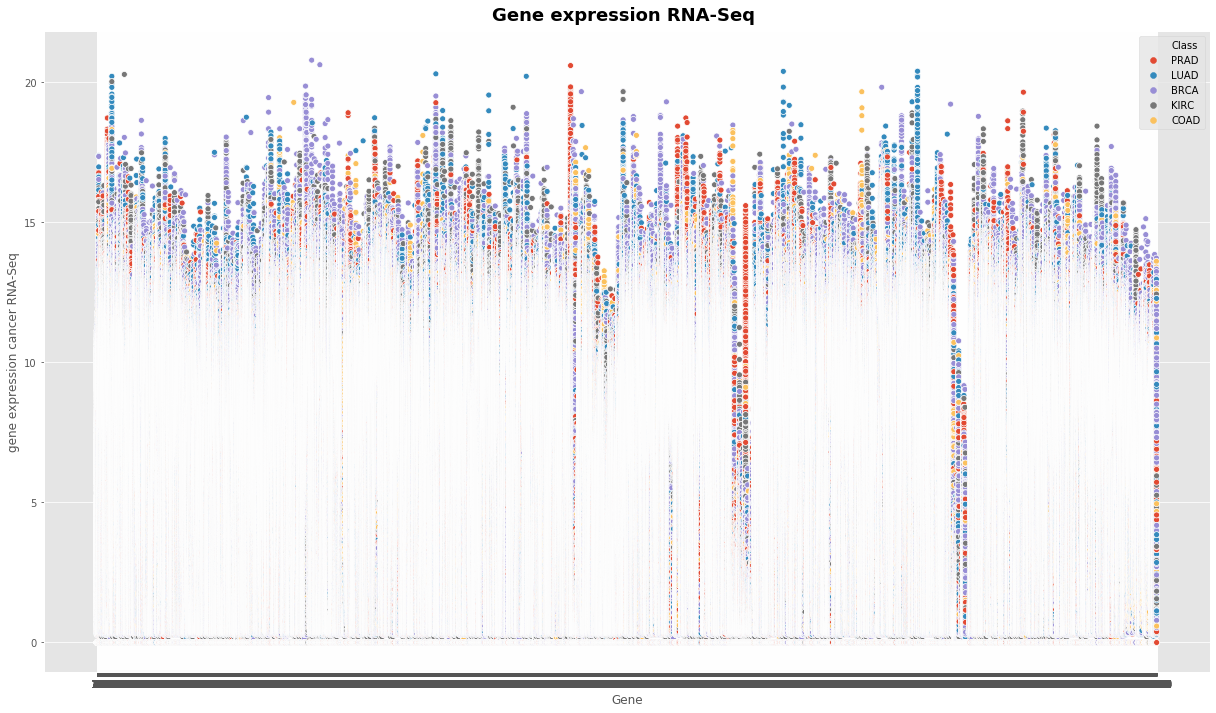

In [44]:
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(ax=ax,data=data_melt, x="Gene", y="value", hue="Class")

# make adjustments
ax.set_ylabel('gene expression cancer RNA-Seq')
ax.set_xlabel('Gene')

ax.text(x=0.5, y=1.01, s='Gene expression RNA-Seq ', fontsize=18, 
        weight='bold', ha='center', va='bottom', transform=ax.transAxes)

fig.tight_layout()
plt.show()

### Specific Class statistics & Altair

Need to add commentary

- used groupby for "Class" column for individual stats (mean, std, min, max, percentiles)
- wanted to get the genes that showed the highest expression over all for the groups, subset the df to get columns with all values at least 12.9 or higher
- created seaborn scatterplot for this subset
- created altair scatterplot and histograms that are linked. Horizontally select section of scatterplot to see a histogram of values contained in the selected section. Can "click" on histograms to see highlighted scatterplot values.

In [25]:
data_rename = data_wide_noindex.drop(columns=['index']).rename(columns={'Unnamed: 0':'Sample Number'})
data_rename.head()

,Sample Number,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [31]:
data_stat_describe

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


In [40]:
data_count_byClass = data_rename.groupby(['Class'])[['Sample Number']].agg('count')
data_gene_mean_byClass = data_rename.groupby(['Class']).agg('mean')
data_gene_std_byClass = data_rename.groupby(['Class']).agg(np.std)
data_gene_min_byClass = data_rename.groupby(['Class']).agg('min')
data_gene_max_byClass = data_rename.groupby(['Class']).agg('max')
data_gene_q25_byClass = data_rename.groupby(['Class']).quantile(0.25)
data_gene_q75_byClass = data_rename.groupby(['Class']).quantile(0.75)
data_gene_q90_byClass = data_rename.groupby(['Class']).quantile(0.90)

In [141]:
data_gene_min_byClass

,Sample Number,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
Class,,,,,,,,,,,,,,,,,,,,,
BRCA,4,0.0,0.0,0.000000,5.009284,8.674496,0.0,4.302421,0.0,0.0,...,2.853517,6.678368,8.858969,0.000000,7.974942,9.210036,8.097774,7.864533,0.691891,0.0
COAD,26,0.0,0.0,0.000000,6.904111,9.113458,0.0,5.051677,0.0,0.0,...,3.272068,7.597561,9.373261,0.000000,8.223442,10.839141,8.393180,8.278445,0.593975,0.0
KIRC,6,0.0,0.0,0.836974,5.083098,8.555398,0.0,3.930747,0.0,0.0,...,4.476745,7.440678,9.108436,0.000000,8.975857,9.261989,8.662583,8.061771,1.527371,0.0
LUAD,1,0.0,0.0,0.000000,5.223307,8.435999,0.0,5.094481,0.0,0.0,...,3.304365,7.066627,8.669456,0.000000,8.381612,10.184181,7.530141,8.313736,0.753091,0.0
PRAD,0,0.0,0.0,1.106616,5.303353,8.970868,0.0,5.367126,0.0,0.0,...,3.515700,7.652157,9.358691,1.639695,8.639825,9.045255,8.838709,7.963919,1.683023,0.0


In [53]:
pd.concat([
    data_gene_mean_byClass.drop(columns=['Sample Number']).loc['BRCA', ].describe(),
    data_gene_mean_byClass.drop(columns=['Sample Number']).loc['COAD', ].describe(),
    data_gene_mean_byClass.drop(columns=['Sample Number']).loc['KIRC', ].describe(),
    data_gene_mean_byClass.drop(columns=['Sample Number']).loc['LUAD', ].describe(),
    data_gene_mean_byClass.drop(columns=['Sample Number']).loc['PRAD', ].describe()
    ], axis=1
         )

,BRCA,COAD,KIRC,LUAD,PRAD
count,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000
mean,6.414118,6.295158,6.478418,6.529268,6.465939
std,3.917707,4.000244,3.940270,3.859109,3.930951
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.725427,2.361418,2.746921,3.073285,2.843542
50%,7.572935,7.361414,7.659163,7.634384,7.542520
75%,9.604643,9.618375,9.648079,9.619147,9.643506
max,16.526564,16.783892,16.780866,16.767862,18.237407


In [54]:
pd.concat([
    data_gene_q90_byClass.drop(columns=['Sample Number']).loc['BRCA', ].describe(),
    data_gene_q90_byClass.drop(columns=['Sample Number']).loc['COAD', ].describe(),
    data_gene_q90_byClass.drop(columns=['Sample Number']).loc['KIRC', ].describe(),
    data_gene_q90_byClass.drop(columns=['Sample Number']).loc['LUAD', ].describe(),
    data_gene_q90_byClass.drop(columns=['Sample Number']).loc['PRAD', ].describe()
    ], axis=1
         )

,BRCA,COAD,KIRC,LUAD,PRAD
count,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000
mean,7.566109,7.256681,7.446025,7.691218,7.363604
std,3.955608,3.984762,3.935532,3.860419,3.917654
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.783597,4.101257,4.576194,5.217278,4.500715
50%,8.830804,8.470657,8.671959,8.864443,8.508574
75%,10.545123,10.339217,10.401245,10.535052,10.339416
max,18.227910,17.443964,17.612848,18.803813,19.303329


In [55]:
pd.concat([
    data_gene_std_byClass.drop(columns=['Sample Number']).loc['BRCA', ].describe(),
    data_gene_std_byClass.drop(columns=['Sample Number']).loc['COAD', ].describe(),
    data_gene_std_byClass.drop(columns=['Sample Number']).loc['KIRC', ].describe(),
    data_gene_std_byClass.drop(columns=['Sample Number']).loc['LUAD', ].describe(),
    data_gene_std_byClass.drop(columns=['Sample Number']).loc['PRAD', ].describe()
    ], axis=1
         )

,BRCA,COAD,KIRC,LUAD,PRAD
count,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000
mean,0.949597,0.802032,0.810386,0.949243,0.757061
std,0.580503,0.569045,0.540293,0.599325,0.486360
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.559457,0.414608,0.440559,0.544243,0.409827
50%,0.809418,0.616869,0.658533,0.787050,0.640595
75%,1.237405,1.100167,1.066802,1.241534,1.023696
max,5.375317,5.428520,5.197497,5.402980,4.372602


In [151]:
data_tv_genes = data_rename.drop(columns=['Class']).loc[:,(data_rename.drop(columns=['Class']) > 12.9).all(axis=0).values]
data_tv_genes['Class'] = data_labels.Class.values
data_tv_genes

,gene_230,gene_232,gene_552,gene_5388,gene_6694,gene_6698,gene_6857,gene_14218,gene_18570,gene_19035,Class
0,16.270208,15.798912,14.612868,16.537164,15.171517,15.488298,15.434475,15.518118,15.776536,15.376814,PRAD
1,16.650112,16.748167,15.202376,15.403671,16.674413,17.483123,17.083396,15.716010,15.702892,15.593750,LUAD
2,15.256430,14.938766,14.462125,16.164263,14.528375,14.552819,16.071555,14.221564,15.687411,14.546304,PRAD
3,15.574987,15.730815,14.722183,16.287308,14.251763,14.392069,14.831609,15.299902,14.489810,14.967249,PRAD
4,16.685392,16.740545,15.619214,16.214600,16.362497,14.250017,16.511941,15.037199,15.174493,14.772577,BRCA
...,...,...,...,...,...,...,...,...,...,...,...
796,16.202725,16.384538,13.953805,15.818964,15.347403,14.330343,15.351198,14.407859,16.406560,14.863126,BRCA
797,16.548373,15.673991,14.219380,15.731062,14.385357,15.374992,15.503462,14.781626,15.697293,13.324490,LUAD
798,17.081858,16.056830,13.929776,15.484593,13.934170,15.090609,15.554904,14.387829,15.895563,14.272943,COAD
799,15.709787,15.481519,13.718308,16.499190,14.136030,15.542705,15.301017,14.911682,16.191466,15.226499,PRAD


In [153]:
# data_genes_melt = data_tv_genes.drop(columns=['Sample Number']).melt(id_vars=['Class'])
data_genes_melt = data_tv_genes.melt(id_vars=['Class'])
data_genes_melt['variable'] = data_genes_melt['variable'].map(lambda x: x.lstrip('gene_'))
data_genes_melt.rename(columns={"variable": "Gene"}, inplace=True)
data_genes_melt.head()

,Class,Gene,value
0,PRAD,230,16.270208
1,LUAD,230,16.650112
2,PRAD,230,15.256430
3,PRAD,230,15.574987
4,BRCA,230,16.685392


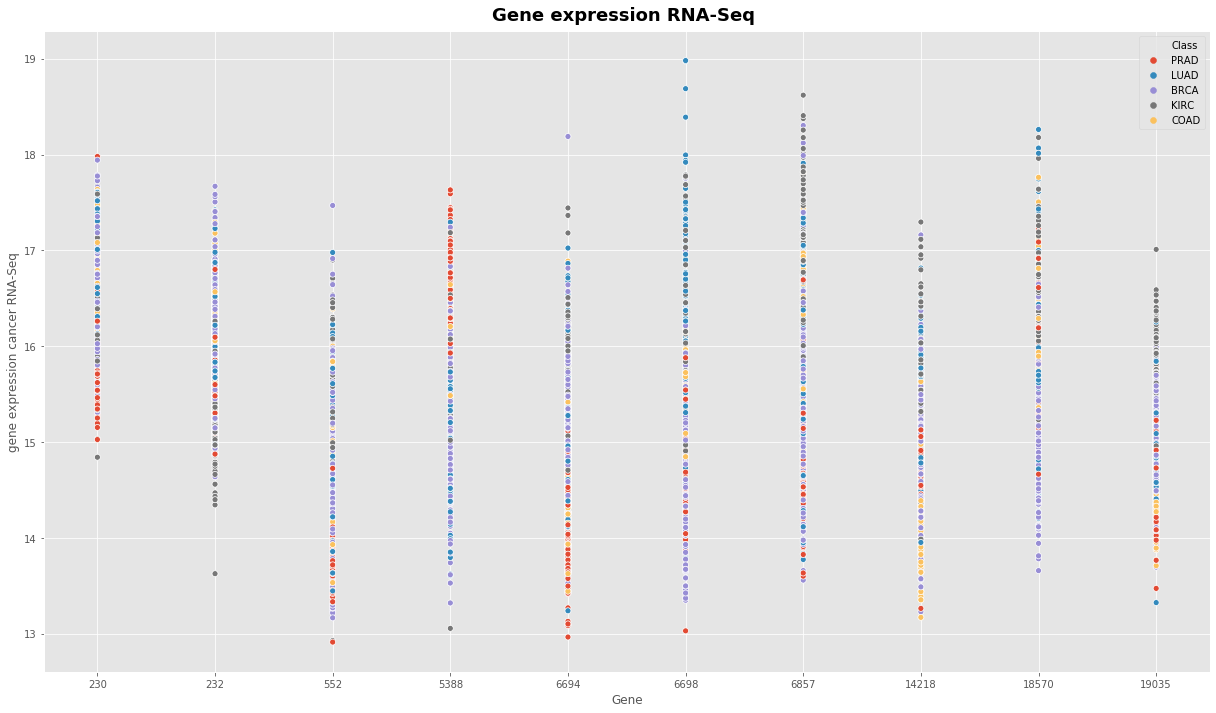

In [154]:
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(ax=ax,data=data_genes_melt, x="Gene", y="value", hue="Class")

# make adjustments
ax.set_ylabel('gene expression cancer RNA-Seq')
ax.set_xlabel('Gene')

ax.text(x=0.5, y=1.01, s='Gene expression RNA-Seq ', fontsize=18, 
        weight='bold', ha='center', va='bottom', transform=ax.transAxes)

fig.tight_layout()
plt.show()

In [184]:
alt.data_transformers.disable_max_rows()

scale = alt.Scale(domain=['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'],
                  range=['#e7ba52', '#a7a7a7', '#aec7e8', '#1f77b4', '#9467bd'])
color = alt.Color('Class:N', scale=scale)

# We create two selections:
# - a brush that is active on the top panel
# - a multi-click that is active on the bottom panel
brush = alt.selection_interval(encodings=['x'])
click = alt.selection_multi(encodings=['color'])


# Top panel is scatter plot of temperature vs time
points = alt.Chart().mark_point().encode(
    alt.X('Gene:N', title='Gene'),
    alt.Y('value:Q',
        title='Gene expression cancer RNA-Seq',
        scale=alt.Scale(domain=[0, 25])
    ),
    color=alt.condition(brush, color, alt.value('lightgray'))
).properties(
    width=550,
    height=300
).add_selection(
    brush, click
).transform_filter(
    click
)

hists = alt.Chart().mark_area( 
    opacity=0.3, 
    interpolate='step'
).encode(
    x=alt.X('value:Q', bin=alt.Bin(maxbins=30)),
    y=alt.Y('count()',
            stack=None),
    color=alt.condition(click, color, alt.value('lightgray'))
).transform_filter(
    brush
).properties(
    width=550,
).add_selection(
    click
)

# Bottom panel is a bar chart of weather type
bars = alt.Chart().mark_bar().encode(
    x='count()',
    y='Class:N',
    color=alt.condition(click, color, alt.value('lightgray')),
).transform_filter(
    brush
).properties(
    width=550,
).add_selection(
    click
)

alt.vconcat(
    points,
    hists,
    data=data_genes_melt,
    title="Gene Expression"
)





alt.VConcatChart(...)